# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#build query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#empty lists to store retrieved data
cityNameList = []
latList = []
lngList = []
maxTempList= []
humidityList = []
cloudinessList = []
windSpeedList = []
countryList = []
dateList = []

#counter variables
record = 0 
log_set = 1

print("Beginning Data Retrieval")
print("------------------------")

#loop through cities
for city in cities:
        
    #get the weather data    
    weather_json = requests.get(query_url + city).json()
    
    try:
        # Get weather data
        
        #store information and add to lists
        cityName = weather_json["name"]
        cityNameList.append(cityName)
        
        lat = weather_json["coord"]["lat"]
        latList.append(lat)
        
        lng = weather_json["coord"]["lon"]
        lngList.append(lng)
        
        maxTemp = weather_json["main"]["temp_max"]
        maxTempList.append(maxTemp)
        
        humidity = weather_json["main"]["humidity"]
        humidityList.append(humidity)
        
        cloudiness = weather_json["clouds"]["all"]
        cloudinessList.append(cloudiness)
        
        windSpeed = weather_json["wind"]["speed"]
        windSpeedList.append(windSpeed)
        
        country = weather_json["sys"]["country"]
        countryList.append(country)
        
        date = weather_json["dt"]
        dateList.append(date)
        
        #prints log of each city 
        print(f"Processing Record {record} of Set {log_set} | {city}")
        
        if record <= 49:
            record +=1
        
        else:
            record = 0
            log_set+=1
      
    except:
        print("City not found - skipping.")

Beginning Data Retrieval
------------------------
Processing Record 0 of Set 1 | chuy
Processing Record 1 of Set 1 | jawa
Processing Record 2 of Set 1 | tilichiki
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | gold coast
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | pimentel
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | trinidad
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | quelimane
Processing Record 13 of Set 1 | boras
City not found - skipping.
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | fougamou
Processing Record 17 of Set 1 | vila franca do campo
Processing Record 18 of Set 1 | ekibastuz
City not found - skipping.
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | bardsir
Processing Record 21 of Set

Processing Record 37 of Set 4 | udachnyy
Processing Record 38 of Set 4 | lamar
Processing Record 39 of Set 4 | manaure
Processing Record 40 of Set 4 | beloha
Processing Record 41 of Set 4 | zalesovo
Processing Record 42 of Set 4 | umba
Processing Record 43 of Set 4 | chester
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | katangli
Processing Record 46 of Set 4 | srednekolymsk
Processing Record 47 of Set 4 | caravelas
Processing Record 48 of Set 4 | atar
Processing Record 49 of Set 4 | nemuro
Processing Record 50 of Set 4 | mmabatho
Processing Record 0 of Set 5 | alyangula
Processing Record 1 of Set 5 | tomatlan
Processing Record 2 of Set 5 | abha
Processing Record 3 of Set 5 | viedma
Processing Record 4 of Set 5 | panzhihua
Processing Record 5 of Set 5 | pilar
Processing Record 6 of Set 5 | lavrentiya
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | beyneu
Processing Record 9 of Set 5 | la ronge
Processing Record 10 of Set 5 | ilulissat
Pr

Processing Record 20 of Set 8 | svetlogorsk
City not found - skipping.
Processing Record 21 of Set 8 | los llanos de aridane
Processing Record 22 of Set 8 | chittaurgarh
Processing Record 23 of Set 8 | bria
Processing Record 24 of Set 8 | shakawe
Processing Record 25 of Set 8 | eyrarbakki
Processing Record 26 of Set 8 | ulladulla
Processing Record 27 of Set 8 | pozo colorado
Processing Record 28 of Set 8 | anshun
Processing Record 29 of Set 8 | tabas
Processing Record 30 of Set 8 | obihiro
Processing Record 31 of Set 8 | merrill
Processing Record 32 of Set 8 | caarapo
Processing Record 33 of Set 8 | oildale
Processing Record 34 of Set 8 | yar-sale
Processing Record 35 of Set 8 | half moon bay
Processing Record 36 of Set 8 | wellington
City not found - skipping.
Processing Record 37 of Set 8 | belmonte
Processing Record 38 of Set 8 | fuerte olimpo
Processing Record 39 of Set 8 | zhangjiakou
City not found - skipping.
Processing Record 40 of Set 8 | sarahan
Processing Record 41 of Set 8 

Processing Record 49 of Set 11 | killarney
City not found - skipping.
Processing Record 50 of Set 11 | qandala
Processing Record 0 of Set 12 | ayaviri
Processing Record 1 of Set 12 | mbalmayo
Processing Record 2 of Set 12 | kandrian
Processing Record 3 of Set 12 | zabaykalsk
Processing Record 4 of Set 12 | itupiranga
City not found - skipping.
City not found - skipping.
Processing Record 5 of Set 12 | pecanha
Processing Record 6 of Set 12 | krabi
Processing Record 7 of Set 12 | nantucket
Processing Record 8 of Set 12 | krasnovishersk
Processing Record 9 of Set 12 | mayo
Processing Record 10 of Set 12 | nouadhibou
Processing Record 11 of Set 12 | fare
Processing Record 12 of Set 12 | klyuchi


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create dataframe
city_df = pd.DataFrame({"City": cityNameList, "Lat": latList, "Lng": lngList, "Max Temp": maxTempList,
                       "Humidity": humidityList, "Cloudiness": cloudinessList, "Wind Speed": windSpeedList,
                       "Country": countryList, "Date": dateList})
#display dataframe
city_df.head()

#export to csvfile 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chui,-33.6971,-53.4616,52.43,89,0,3.83,UY,1634880392
1,Jāwā,31.8525,35.9393,61.11,59,0,0.00,JO,1634880746
2,Tilichiki,60.4667,166.1000,6.71,88,16,5.23,RU,1634880747
3,Longyearbyen,78.2186,15.6401,17.44,93,75,8.05,SJ,1634880747
4,Gold Coast,-28.0000,153.4333,82.24,82,90,1.99,AU,1634880748


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#identify cities with humidity > 100
high_humidity = city_df.loc[city_df["Humidity"] > int(100)]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

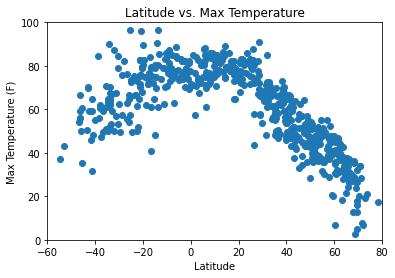

<Figure size 432x288 with 0 Axes>

In [125]:
#scatter plot of the data
plt.scatter(city_df["Lat"], city_df["Max Temp"])

#labels
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#axes limits
plt.ylim(0, 100)
plt.xlim(-60, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/lat_temp.png")

## Latitude vs. Humidity Plot

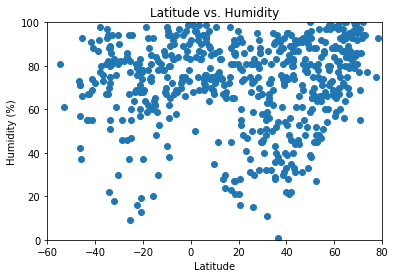

<Figure size 432x288 with 0 Axes>

In [126]:
#scatter plot of the data
plt.scatter(city_df["Lat"], city_df["Humidity"])

#labels
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(-60, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/lat_humidity.png")

## Latitude vs. Cloudiness Plot

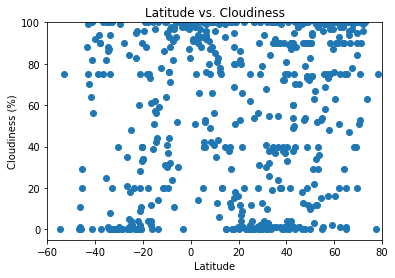

<Figure size 432x288 with 0 Axes>

In [127]:
#scatter plot of the data
plt.scatter(city_df["Lat"], city_df["Cloudiness"])

#labels
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#axes limits
plt.ylim(-5, 100)
plt.xlim(-60, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

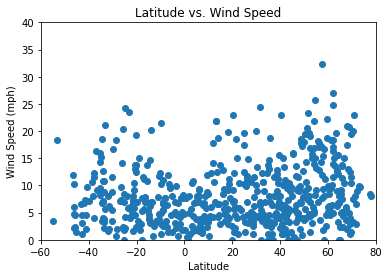

<Figure size 432x288 with 0 Axes>

In [128]:
#scatter plot of the data
plt.scatter(city_df["Lat"], city_df["Wind Speed"])

#labels
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#axes limits
plt.ylim(0, 40)
plt.xlim(-60, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/lat_windspeed.png")

## Linear Regression

In [129]:
#create northern and southern hemisphere variables
northern_hemisphere = city_df.loc[city_df["Lat"] > 0 ]
southern_hemisphere = city_df.loc[city_df["Lat"] < 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between northen hemisphere latitude and max temperature is -0.89.


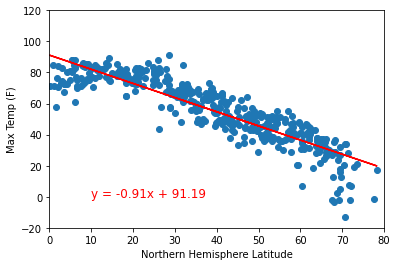

<Figure size 432x288 with 0 Axes>

In [130]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between northen hemisphere latitude and max temperature is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# linear regression line 
yvalues = (northern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.plot(northern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(10,0),fontsize=12,color="red")
plt.xlabel ("Northern Hemisphere Latitude")
plt.ylabel ("Max Temp (F)")

#axes limits
plt.ylim(-20, 120)
plt.xlim(0, 80)

#display plot
plt.show()

#save image
plt.savefig("Images/nh_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation southern hemisphere latitude and max temperature is 0.61.


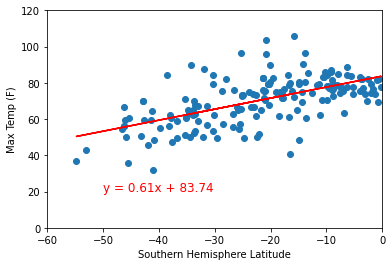

<Figure size 432x288 with 0 Axes>

In [131]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation southern hemisphere latitude and max temperature is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# linear regression line 
yvalues = (southern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
plt.plot(southern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(-50, 20),fontsize=12,color="red")
plt.xlabel ("Southern Hemisphere Latitude")
plt.ylabel ("Max Temp (F)")

#axes limits
plt.ylim(0, 120)
plt.xlim(-60, 0)

#display plot
plt.show()

#save image
plt.savefig("Images/sh_lat_temp_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between northern hemisphere latitude and humidity is 0.15.


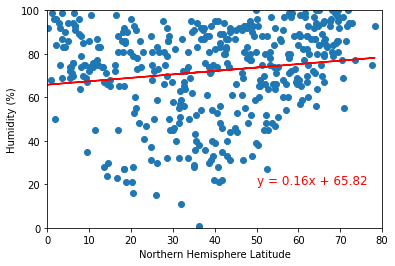

<Figure size 432x288 with 0 Axes>

In [132]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between northern hemisphere latitude and humidity is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# linear regression line 
yvalues = (northern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.plot(northern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(50, 20),fontsize=12,color="red")
plt.xlabel ("Northern Hemisphere Latitude")
plt.ylabel ("Humidity (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(0, 80)

#display the plot 
plt.show()

#save image
plt.savefig("Images/nh_lat_humidity_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between southern hemisphere latitude and humidity is 0.13.


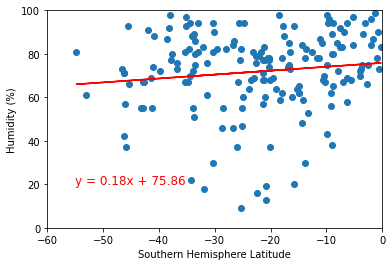

<Figure size 432x288 with 0 Axes>

In [133]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between southern hemisphere latitude and humidity is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# linear regression line 
yvalues = (southern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.plot(southern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(-55, 20),fontsize=12,color="red")
plt.xlabel ("Southern Hemisphere Latitude")
plt.ylabel ("Humidity (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(-60, 0)

#display the plot
plt.show()

#save image
plt.savefig("Images/sh_lat_humidity_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between northern hemisphere latitude and cloudiness is 0.17.


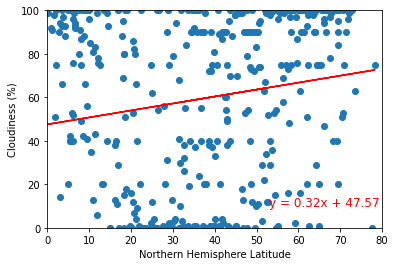

<Figure size 432x288 with 0 Axes>

In [134]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between northern hemisphere latitude and cloudiness is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# linear regression line 
yvalues = (northern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.plot(northern_hemisphere["Lat"], yvalues, color = "red")

#annotiation and labels
plt.annotate(line_eq,(53, 10),fontsize=12,color="red")
plt.xlabel ("Northern Hemisphere Latitude")
plt.ylabel ("Cloudiness (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(0, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/nh_lat_cloudiness_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between southern hemisphere latitude and cloudiness is 0.28.


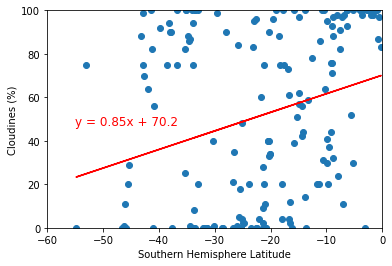

<Figure size 432x288 with 0 Axes>

In [135]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between southern hemisphere latitude and cloudiness is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# linear regression line 
yvalues = (southern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.plot(southern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(-55, 47),fontsize=12,color="red")
plt.xlabel ("Southern Hemisphere Latitude")
plt.ylabel ("Cloudines (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(-60, 0)

#display the plot
plt.show()

#save image
plt.savefig("Images/sh_lat_cloudiness_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between northern hemisphere latitude and wind speed is 0.24.


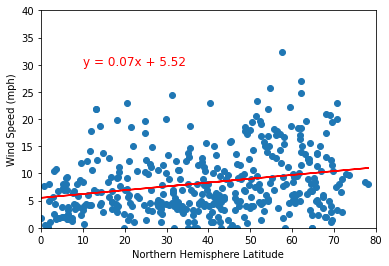

<Figure size 432x288 with 0 Axes>

In [136]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between northern hemisphere latitude and wind speed is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# linear regression line 
yvalues = (northern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.plot(northern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(10, 30),fontsize=12,color="red")
plt.xlabel ("Northern Hemisphere Latitude")
plt.ylabel ("Wind Speed (mph)")

#axes limits
plt.ylim(0, 40)
plt.xlim(0, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/nh_lat_windspeed_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between southern hemisphere latitude and wind speed is -0.12.


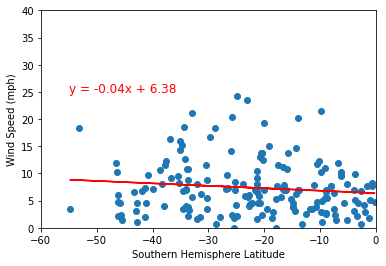

<Figure size 432x288 with 0 Axes>

In [137]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between southern hemisphere latitude and wind speed is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# linear regression line 
yvalues = (southern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.plot(southern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(-55, 25),fontsize=12,color="red")
plt.xlabel ("Southern Hemisphere Latitude")
plt.ylabel ("Wind Speed (mph)")

#axes limits
plt.ylim(0, 40)
plt.xlim(-60, 0)

#display the plot
plt.show()

#save image
plt.savefig("Images/sh_lat_windspeed_regression.png")